<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/Demographic_Static_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Demographic Static Train

In [2]:
df2 = pd.read_csv('/content/demographics_static_train.csv')
df2.head()

,Unnamed: 0,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,0,168674,Hispanic or Latino,Male,White,Yes
1,1,168681,Not Hispanic or Latino,Male,White,Yes
2,2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,3,168711,Not Hispanic or Latino,Male,Other,Yes
4,4,168720,Not Hispanic or Latino,Male,White,Yes


In [3]:
df2 = df2.drop('Unnamed: 0', axis = 1)
df2.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [4]:
df2.shape # same as demographic event train

(133252, 5)

In [5]:
df2.isnull().sum()

Internalpatientid    0
Ethnicity            0
Gender               0
Races                0
Veteran flag         0
dtype: int64

In [6]:
df2.nunique()

Internalpatientid    133252
Ethnicity                 3
Gender                    2
Races                    15
Veteran flag              2
dtype: int64

In [7]:
df2['Ethnicity'].value_counts()

Not Hispanic or Latino    102367
Not specified              26486
Hispanic or Latino          4399
Name: Ethnicity, dtype: int64

In [8]:
df2['Gender'].value_counts()

Male      129777
Female      3475
Name: Gender, dtype: int64

In [9]:
df2['Races'].value_counts()

White                                        85159
Not specified (no value)                     22501
Black or African American                    16699
Other                                         6513
White ; Other                                 1431
Asian                                          431
Black or African American ; Other              267
Black or African American ; White              198
Asian ; Other                                   17
White ; Asian                                   16
Black or African American ; White ; Other       11
White ; Asian ; Other                            5
Black or African American ; Asian                2
(Censored)                                       1
Black or African American ; White ; Asian        1
Name: Races, dtype: int64

In [10]:
df2['Veteran flag'].value_counts()

Yes    133093
No        159
Name: Veteran flag, dtype: int64

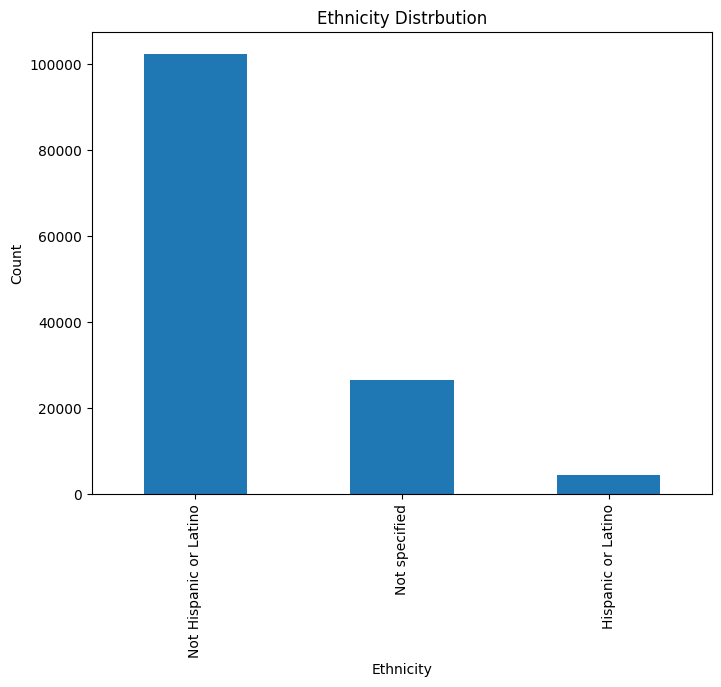

In [11]:
# Analyze the ethinicity distribution

ethinicity_distribution = df2['Ethnicity'].value_counts()

# Map the values to meaningful categories

ethinicity_distribution = ethinicity_distribution.replace({
    1:'Not Hispanic or Latino',
    2: 'Not specified',
    3: 'Hispanic or Latino'
})

# Plot the ethinicty distrbution

plt.figure(figsize=(8,6))
ethinicity_distribution.plot(kind = 'bar')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distrbution')
plt.show()

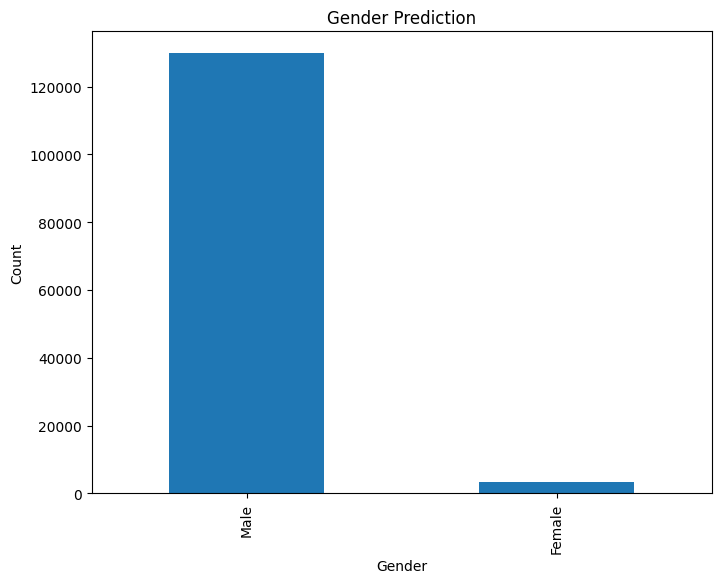

In [12]:
# Analyze the gender distrbution

gender_distribution = df2['Gender'].value_counts()

#plot the gender distribution

plt.figure(figsize=(8,6))
gender_distribution.plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Prediction')
plt.show()

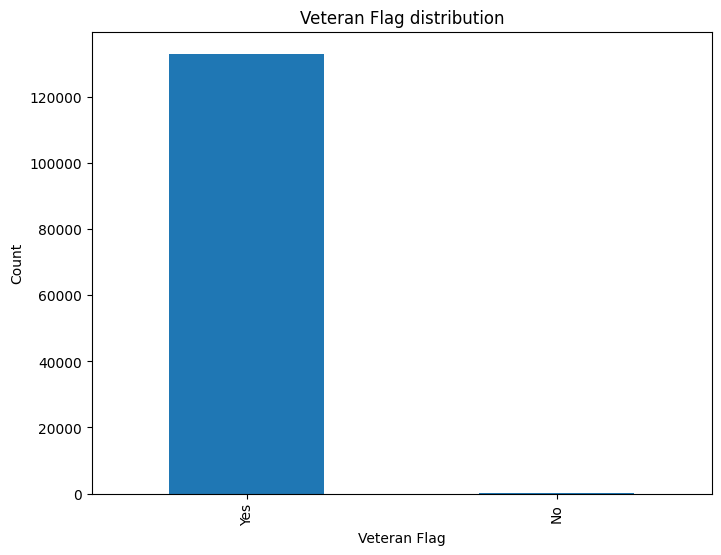

In [13]:
#Analyze the veteran flag distribution

veteran_flag_distribution = df2['Veteran flag'].value_counts()

# Plot the veteran flag distribution

plt.figure(figsize = (8,6))
veteran_flag_distribution.plot(kind = 'bar')
plt.xlabel('Veteran Flag')
plt.ylabel('Count')
plt.title('Veteran Flag distribution')
plt.show()

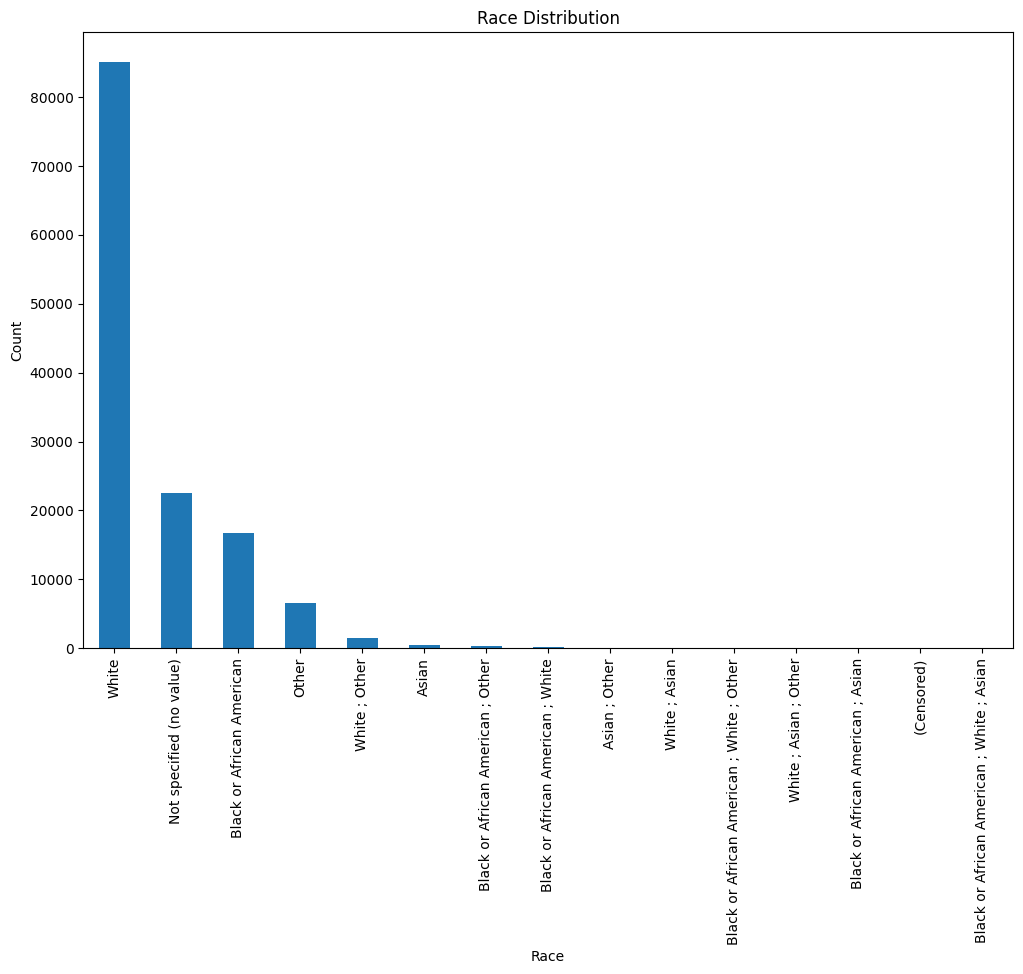

In [14]:
# Analyze the races distribtion

races_distribution = df2['Races'].value_counts()

#Plot the races distrbution

plt.figure(figsize=(12,8))
races_distribution.plot(kind = 'bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()

In [15]:

death_file = pd.read_csv('/content/death_train.csv')
death_file.head()

,Unnamed: 0,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10.0
1,1,100037,75.241135,2008-10-16 15:14:26.0
2,2,100045,85.399403,2019-01-26 11:33:52.0
3,3,100095,84.136551,2004-08-10 21:49:35.0
4,6,10013,68.372126,2007-06-11 00:17:06.0


In [16]:
death_file = death_file.drop('Unnamed: 0', axis = 1)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0


In [17]:
death_file.shape

(97284, 3)

In [18]:
death_file['death'] = 1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10.0,1
1,100037,75.241135,2008-10-16 15:14:26.0,1
2,100045,85.399403,2019-01-26 11:33:52.0,1
3,100095,84.136551,2004-08-10 21:49:35.0,1
4,10013,68.372126,2007-06-11 00:17:06.0,1


In [19]:
merge_demographic_static_death= pd.merge(df2, death_file, how='left',on='Internalpatientid')

In [20]:
merge_demographic_static_death.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,Age at death,Death date,death
0,168674,Hispanic or Latino,Male,White,Yes,91.750072,2016-07-14 15:37:51.0,1.0
1,168681,Not Hispanic or Latino,Male,White,Yes,77.813946,2022-05-26 23:56:11.0,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes,52.394255,2012-04-09 02:24:20.0,1.0
3,168711,Not Hispanic or Latino,Male,Other,Yes,NaN,NaN,NaN
4,168720,Not Hispanic or Latino,Male,White,Yes,NaN,NaN,NaN


In [21]:

merge_demographic_static_death['death'] = merge_demographic_static_death['death'].fillna(0.0)

merge_demographic_static_death.head()


,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,Age at death,Death date,death
0,168674,Hispanic or Latino,Male,White,Yes,91.750072,2016-07-14 15:37:51.0,1.0
1,168681,Not Hispanic or Latino,Male,White,Yes,77.813946,2022-05-26 23:56:11.0,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes,52.394255,2012-04-09 02:24:20.0,1.0
3,168711,Not Hispanic or Latino,Male,Other,Yes,NaN,NaN,0.0
4,168720,Not Hispanic or Latino,Male,White,Yes,NaN,NaN,0.0


In [22]:
merge_demographic_static_death.drop(['Age at death','Death date'],axis = 1, inplace = True)

In [23]:
merge_demographic_static_death.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,death
0,168674,Hispanic or Latino,Male,White,Yes,1.0
1,168681,Not Hispanic or Latino,Male,White,Yes,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes,1.0
3,168711,Not Hispanic or Latino,Male,Other,Yes,0.0
4,168720,Not Hispanic or Latino,Male,White,Yes,0.0


## Bivairate Analysis

## 1.Ethnicity & Death

In [28]:

ethnicity_death_crosstab = pd.crosstab(merge_demographic_static_death['Ethnicity'],merge_demographic_static_death['death'])
print(ethnicity_death_crosstab)

death                     0.0    1.0
Ethnicity                           
Hispanic or Latino       1609   2790
Not Hispanic or Latino  31567  70800
Not specified            2792  23694


In [35]:
#calculate the percentage within each Ethnicity category

ethnicity_death_proportions = ethnicity_death_crosstab.div(ethnicity_death_crosstab.sum(axis = 1), axis = 0)*100

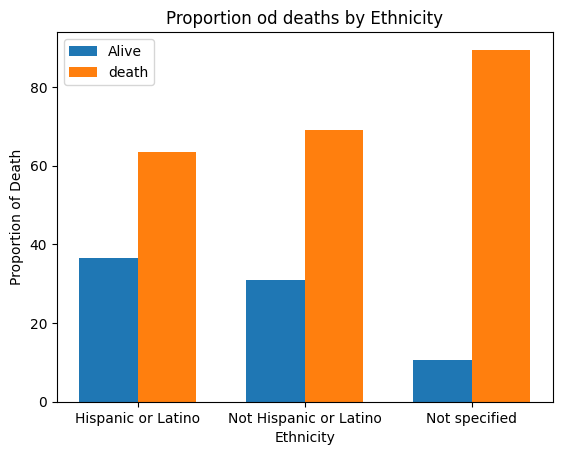

In [36]:
width = 0.35
x = range(len(ethnicity_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,ethnicity_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], ethnicity_death_proportions[1], width, label = "death")

ax.set_xlabel('Ethnicity')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Ethnicity')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(ethnicity_death_proportions.index)
ax.legend()

plt.show()

## 2. Gender and Death

In [37]:
Gender_death_crosstab = pd.crosstab(merge_demographic_static_death['Gender'],merge_demographic_static_death['death'])
print(Gender_death_crosstab)

death     0.0    1.0
Gender              
Female   1577   1898
Male    34391  95386


In [38]:
#calculate the percentage within each Gender category

Gender_death_proportions = Gender_death_crosstab.div(Gender_death_crosstab.sum(axis = 1), axis = 0)*100

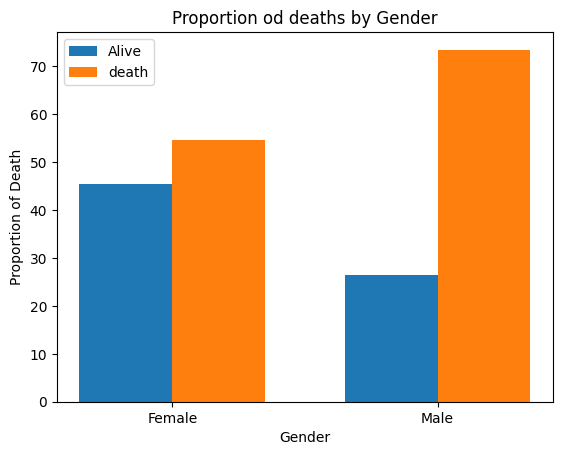

In [39]:
width = 0.35
x = range(len(Gender_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Gender_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Gender_death_proportions[1], width, label = "death")

ax.set_xlabel('Gender')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Gender')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Gender_death_proportions.index)
ax.legend()

plt.show()

## 3. Races & Death

In [40]:
Races_death_crosstab = pd.crosstab(merge_demographic_static_death['Races'],merge_demographic_static_death['death'])
print(Races_death_crosstab)

death                                        0.0    1.0
Races                                                  
(Censored)                                     1      0
Asian                                        180    251
Asian ; Other                                  4     13
Black or African American                   6777   9922
Black or African American ; Asian              1      1
Black or African American ; Other            104    163
Black or African American ; White             67    131
Black or African American ; White ; Asian      1      0
Black or African American ; White ; Other      5      6
Not specified (no value)                     826  21675
Other                                       1992   4521
White                                      25582  59577
White ; Asian                                  8      8
White ; Asian ; Other                          1      4
White ; Other                                419   1012


In [41]:
#calculate the percentage within each Gender category

Races_death_proportions = Races_death_crosstab.div(Races_death_crosstab.sum(axis = 1), axis = 0)*100

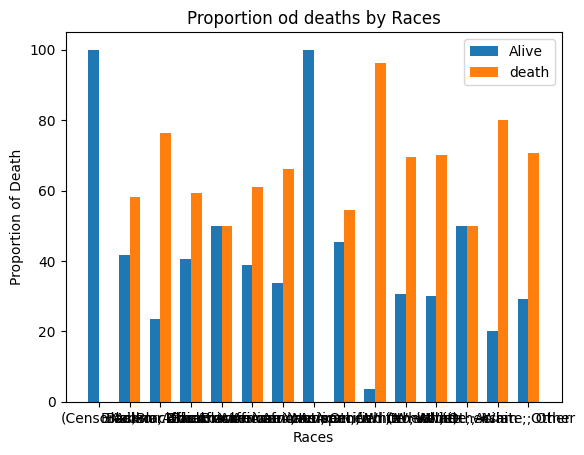

In [42]:
width = 0.35
x = range(len(Races_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Races_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Races_death_proportions[1], width, label = "death")

ax.set_xlabel('Races')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Races')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Races_death_proportions.index)
ax.legend()

plt.show()

## 4. Veteranflag & Death

In [43]:
Veteranflag_death_crosstab = pd.crosstab(merge_demographic_static_death['Veteran flag'],merge_demographic_static_death['death'])
print(Veteranflag_death_crosstab)

death           0.0    1.0
Veteran flag              
No               56    103
Yes           35912  97181


In [44]:
#calculate the percentage within each veteranflag category

Veteranflag_death_proportions = Veteranflag_death_crosstab.div(Veteranflag_death_crosstab.sum(axis = 1), axis = 0)*100

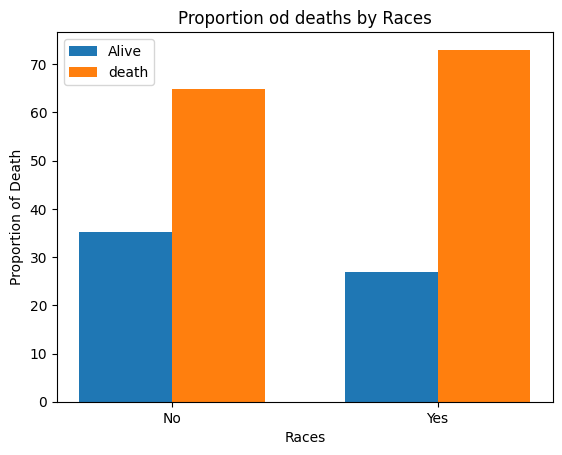

In [45]:
width = 0.35
x = range(len(Veteranflag_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Veteranflag_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Veteranflag_death_proportions[1], width, label = "death")

ax.set_xlabel('Races')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Races')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Veteranflag_death_proportions.index)
ax.legend()

plt.show()